In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# 標準ライブラリ
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he


In [14]:
base_df = hs.load_hard_sales()

### PS5/PS4差分

PS4とPS5の推移差は日本版の値下げによっても縮まっていませんが､
これ以上差が広がるのを防ぐ効果はあったようです｡
ただ､年末年始を過ぎた後にどうなるかは分かりません｡


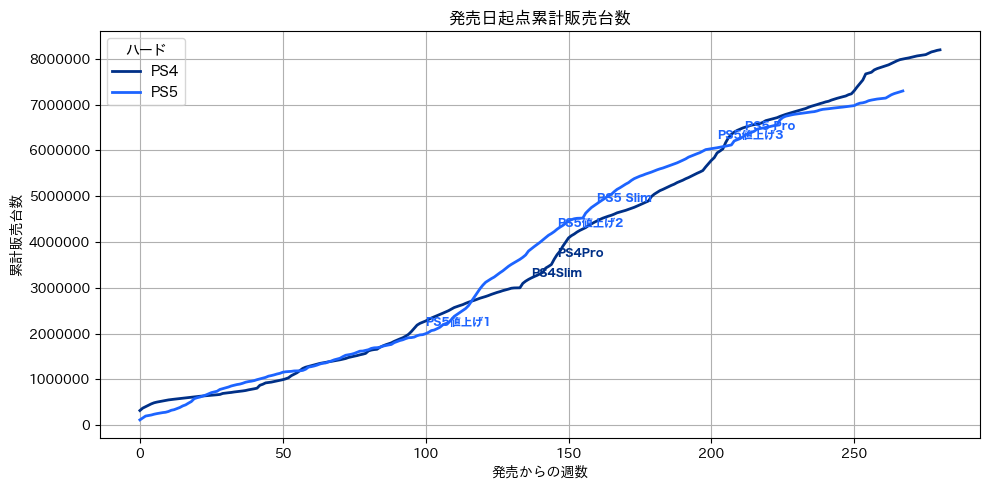

In [3]:
ps45_event_mask = he.EventMasks(hard=1.5, soft=0, event=1, price=1, sale=0)
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=['PS4', 'PS5'], end=280, event_mask=ps45_event_mask)

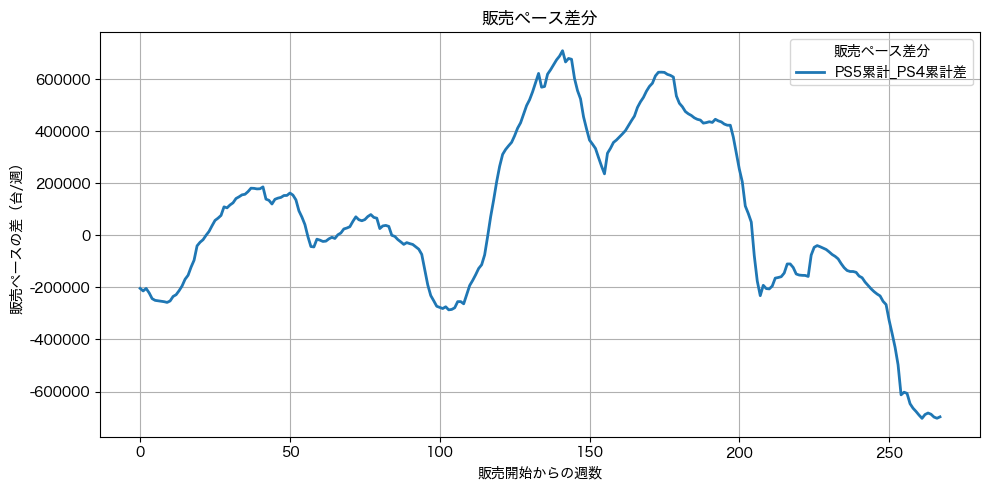

In [5]:
(fig, df) = ph.plot_sales_pase_diff('PS4', 'PS5')


In [6]:
df.tail(10)

,PS5累計_PS4累計差,ps4_report_date,ps5_report_date
258,-664251.0,2019-02-03,2025-10-26
259,-676695.0,2019-02-10,2025-11-02
260,-690575.0,2019-02-17,2025-11-09
261,-703092.0,2019-02-24,2025-11-16
262,-688511.0,2019-03-03,2025-11-23
263,-682674.0,2019-03-10,2025-11-30
264,-687382.0,2019-03-17,2025-12-07
265,-698216.0,2019-03-24,2025-12-14
266,-702772.0,2019-03-31,2025-12-21
267,-697394.0,2019-04-07,2025-12-28


In [21]:
monthly_maker_2017_df = hs.monthly_sales(base_df, begin=datetime(2017,1,1), end=datetime(2017,12,31), maker_mode=True)
monthly_maker_nintendo_2017_df = monthly_maker_2017_df[monthly_maker_2017_df['maker_name'] == 'Nintendo']

monthly_maker_2025_df = hs.monthly_sales(base_df, begin=datetime(2025,1,1), end=datetime(2025,12,31), maker_mode=True)
monthly_maker_nintendo_2025_df = monthly_maker_2025_df[monthly_maker_2025_df['maker_name'] == 'Nintendo']

monthly_maker_nintendo_2017_df

,year,month,maker_name,monthly_units,sum_units
1,2017,1,Nintendo,365952,365952
4,2017,2,Nintendo,118107,484059
7,2017,3,Nintendo,685919,1169978
10,2017,4,Nintendo,366839,1536817
13,2017,5,Nintendo,191787,1728604
16,2017,6,Nintendo,179466,1908070
19,2017,7,Nintendo,522608,2430678
22,2017,8,Nintendo,431388,2862066
25,2017,9,Nintendo,256183,3118249
28,2017,10,Nintendo,403296,3521545


In [23]:
monthly_maker_nintendo_2025_df

,year,month,maker_name,monthly_units,sum_units
1,2025,1,Nintendo,260447,260447
4,2025,2,Nintendo,167188,427635
7,2025,3,Nintendo,171921,599556
10,2025,4,Nintendo,113513,713069
13,2025,5,Nintendo,106506,819575
16,2025,6,Nintendo,1247781,2067356
19,2025,7,Nintendo,502238,2569594
22,2025,8,Nintendo,414207,2983801
25,2025,9,Nintendo,258488,3242289
28,2025,10,Nintendo,454479,3696768
